In [25]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors 
import seaborn as sns; sns.set(color_codes=True)

LRTAnalysis_master = uproot.open("/data/newhouse/LRT/batch/testing/master_22.0.16/VH4b/LRTAnalysisAlg.root")
LRTAnalysis_PRDfix = uproot.open("/data/newhouse/LRT/batch/testing/master_22.0.16_PRDfix/VH4b/LRTAnalysisAlg.root")
# LRTAnalysis_nn = uproot.open("/data/newhouse/LRT/batch/testing/testing_21p0_v7_doR3LargeD0_nn/VH4b/LRTAnalysis_output.root")

In [26]:

event_branches = ['nTracks',
                  'nTruth',
                  'nTracksAccept',
                  'nTruthAccept',
                  'mu',
                  'event',
                  'mcid',]
# event_tree = LRTAnalysis['eventTree'].pandas.df(event_branches)
# event_tree_nn = LRTAnalysis_nn['Trees/eventTree'].pandas.df(event_branches)

truth_branches=[
'truth_link',
'truth_type',
'truth_nSiHits',
'truth_nPixHits',
'truth_status',
'truth_fidPass',
'truth_r',
'truth_phi',
'truth_dphi',
'truth_z',
'truth_pt',
'truth_qOp',
'truth_d0',
'truth_z0',
'truth_eta',
'truth_barcode',
'truth_charge',
'truth_pdgId',
'truth_parentIdLLP',
'truth_parentId',
'truth_VSIorigin',
]
# truth_tree = LRTAnalysis['eventTree'].pandas.df(truth_branches)
# truth_tree_nn = LRTAnalysis_nn['Trees/eventTree'].pandas.df(truth_branches)

track_branches = [
'isFake',
'isSignal',
'truth_origin',
'index',
'truth_matchProb',
'pt',
'qOp',
'eta',
'd0',
'z0',
'link',
'isLRTrack',
'radiusOdFirstHit',
'nSiHits',
'nPixHits',
'nTRTHits',
'nPixHoles',
'nSiHoles',
'nPixShared',
'nSiShared',
'nContribPixLay',
'nPixOutliers',
'nSiOutliers',
'nTRTOutliers',
'chiSquared',
'nDOF',
'passLoose',
'passTight',
]
track_tree_master = LRTAnalysis_master['eventTree'].pandas.df(track_branches)
track_tree_PRDfix = LRTAnalysis_PRDfix['eventTree'].pandas.df(track_branches)
# track_tree_nn = LRTAnalysis_nn['Trees/eventTree'].pandas.df(track_branches)


In [ ]:
for df in [track_tree_master, track_tree_PRDfix]:
    df['nSCTShared'] = df['nSiShared'] - df['nPixShared']
    

In [62]:
print('LRT', len(track_tree.query('isLRTrack==1')))
print('Standard', len(track_tree.query('isLRTrack==0')))

LRT 371691
Standard 2798274


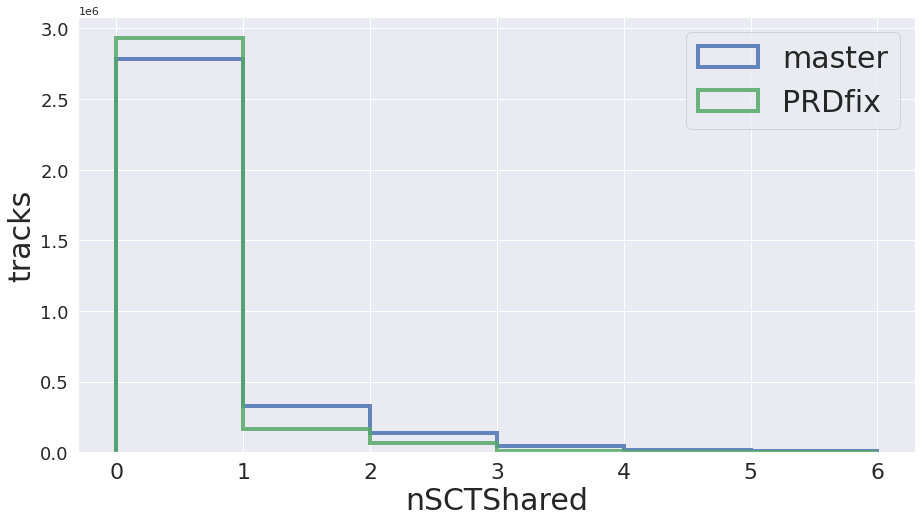

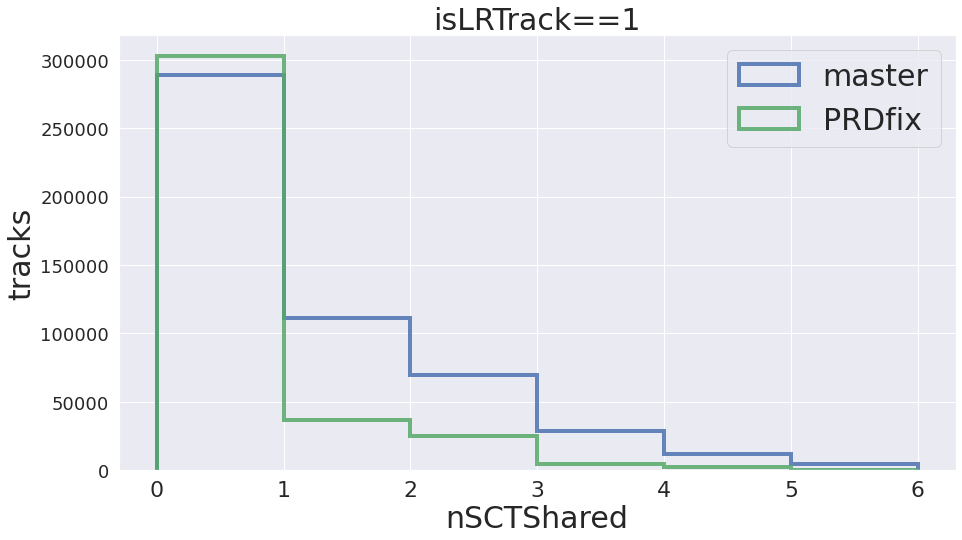

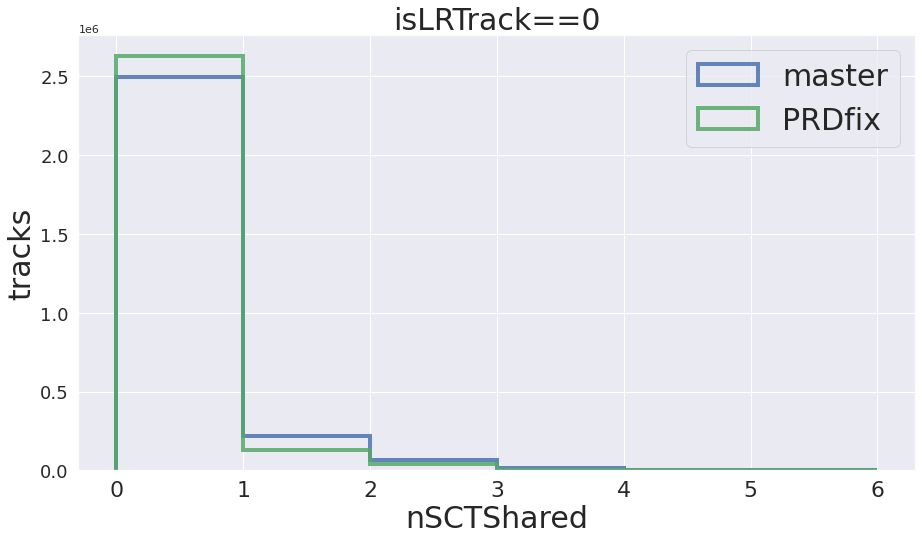

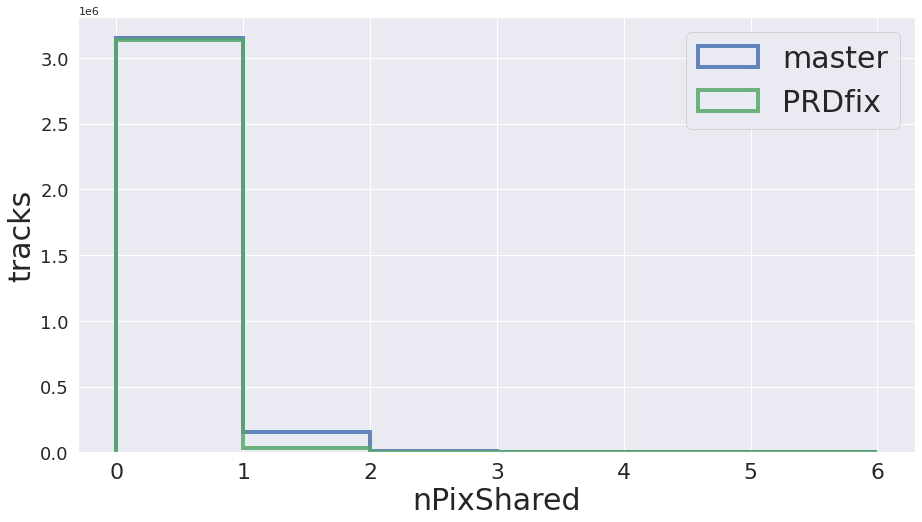

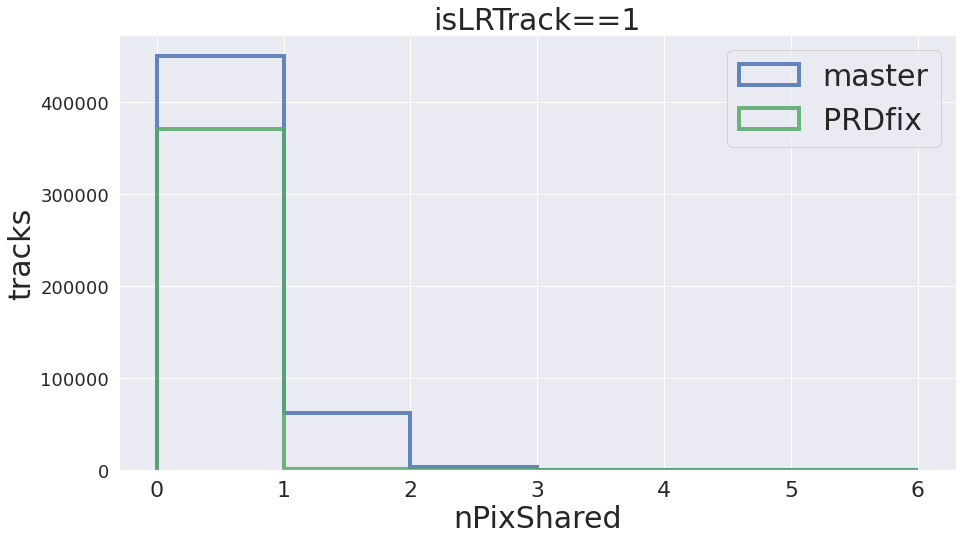

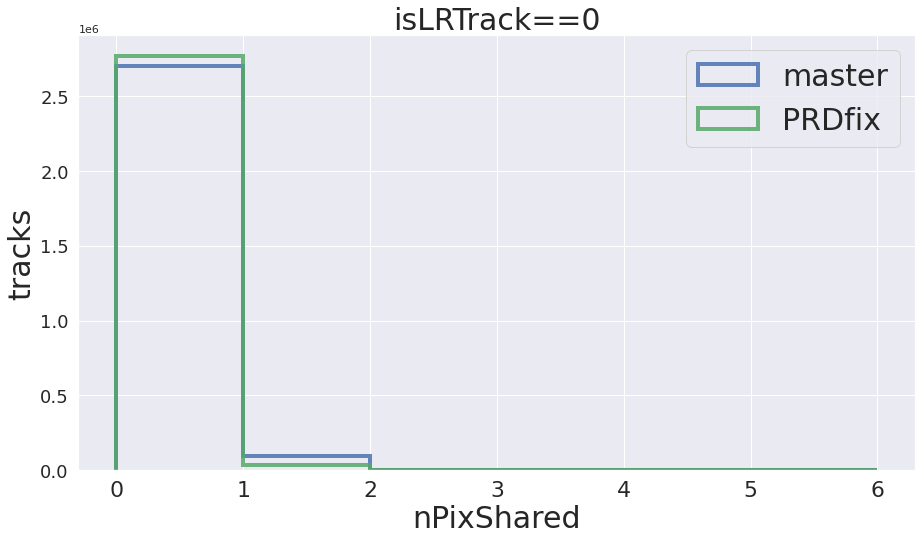

In [93]:
var = 'nSCTShared'

def plot_shared(var, query=None):
    hist_options = {
        'bins' : np.arange(0,7),
        'histtype' : 'step',
        'linewidth' : 4, 
        'alpha' : 0.85, 
        'density' : None,
        'log' : False
    }

    fig = plt.figure(figsize=[15,8])
    ax = plt.gca()
    
    if not query:
        ax.hist(track_tree_master[var], edgecolor='#4C72B0', label='master', **hist_options)
        ax.hist(track_tree_PRDfix[var], edgecolor='#55A868', label='PRDfix', **hist_options)        
    else:
        ax.hist(track_tree_master.query(query)[var], edgecolor='#4C72B0', label='master', **hist_options)
        ax.hist(track_tree_PRDfix.query(query)[var], edgecolor='#55A868', label='PRDfix', **hist_options)
    ax.legend(loc='upper right', fontsize=30)

    if not query==None: ax.set_title(query, fontsize = 30)
    ax.set_xlabel(var, fontsize = 30)
    ax.set_ylabel('tracks', fontsize = 30)
    ax.tick_params(axis='x', which='major', labelsize=22)
    ax.tick_params(axis='y', which='major', labelsize=18)

    
plot_shared('nSCTShared')  
plot_shared('nSCTShared', query='isLRTrack==1')
plot_shared('nSCTShared', query='isLRTrack==0')
plot_shared('nPixShared')
plot_shared('nPixShared', query='isLRTrack==1')
plot_shared('nPixShared', query='isLRTrack==0')
